                                        LOGISTIC REGRESSION

IMPORT LIBRARIES :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Features, Data Types, Summary Statistics

In [5]:
diabetes.info()
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Visualizations

Histogram

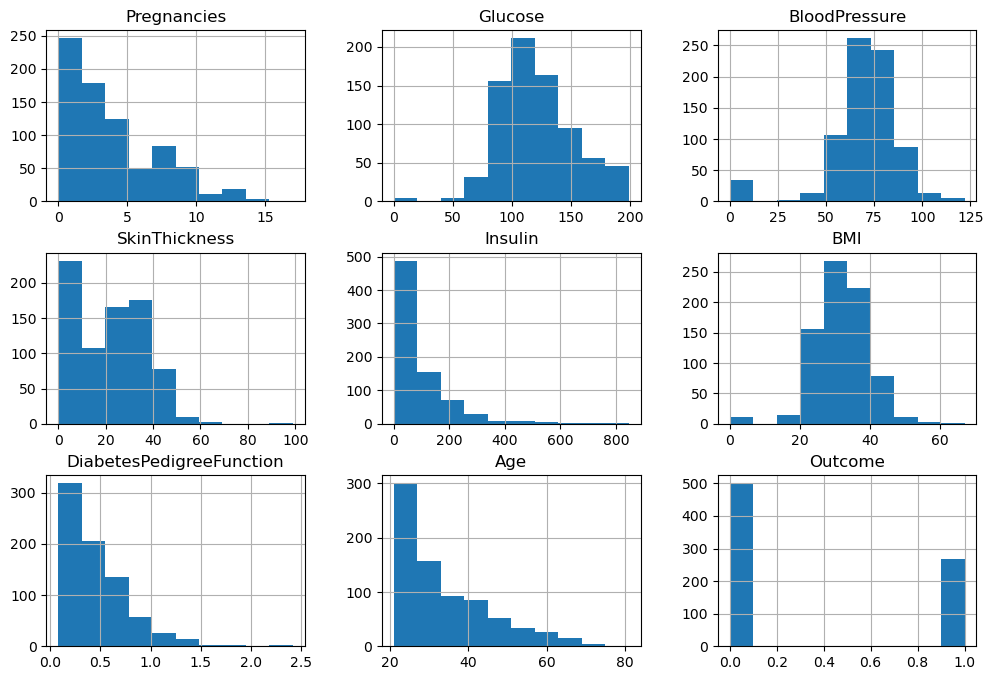

In [6]:
diabetes.hist(figsize=(12,8))
plt.show()

BOXPLOT :

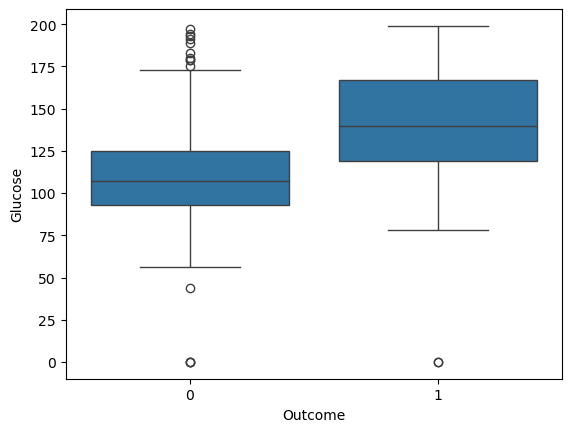

In [7]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes)
plt.show()

PAIR PLOT :

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


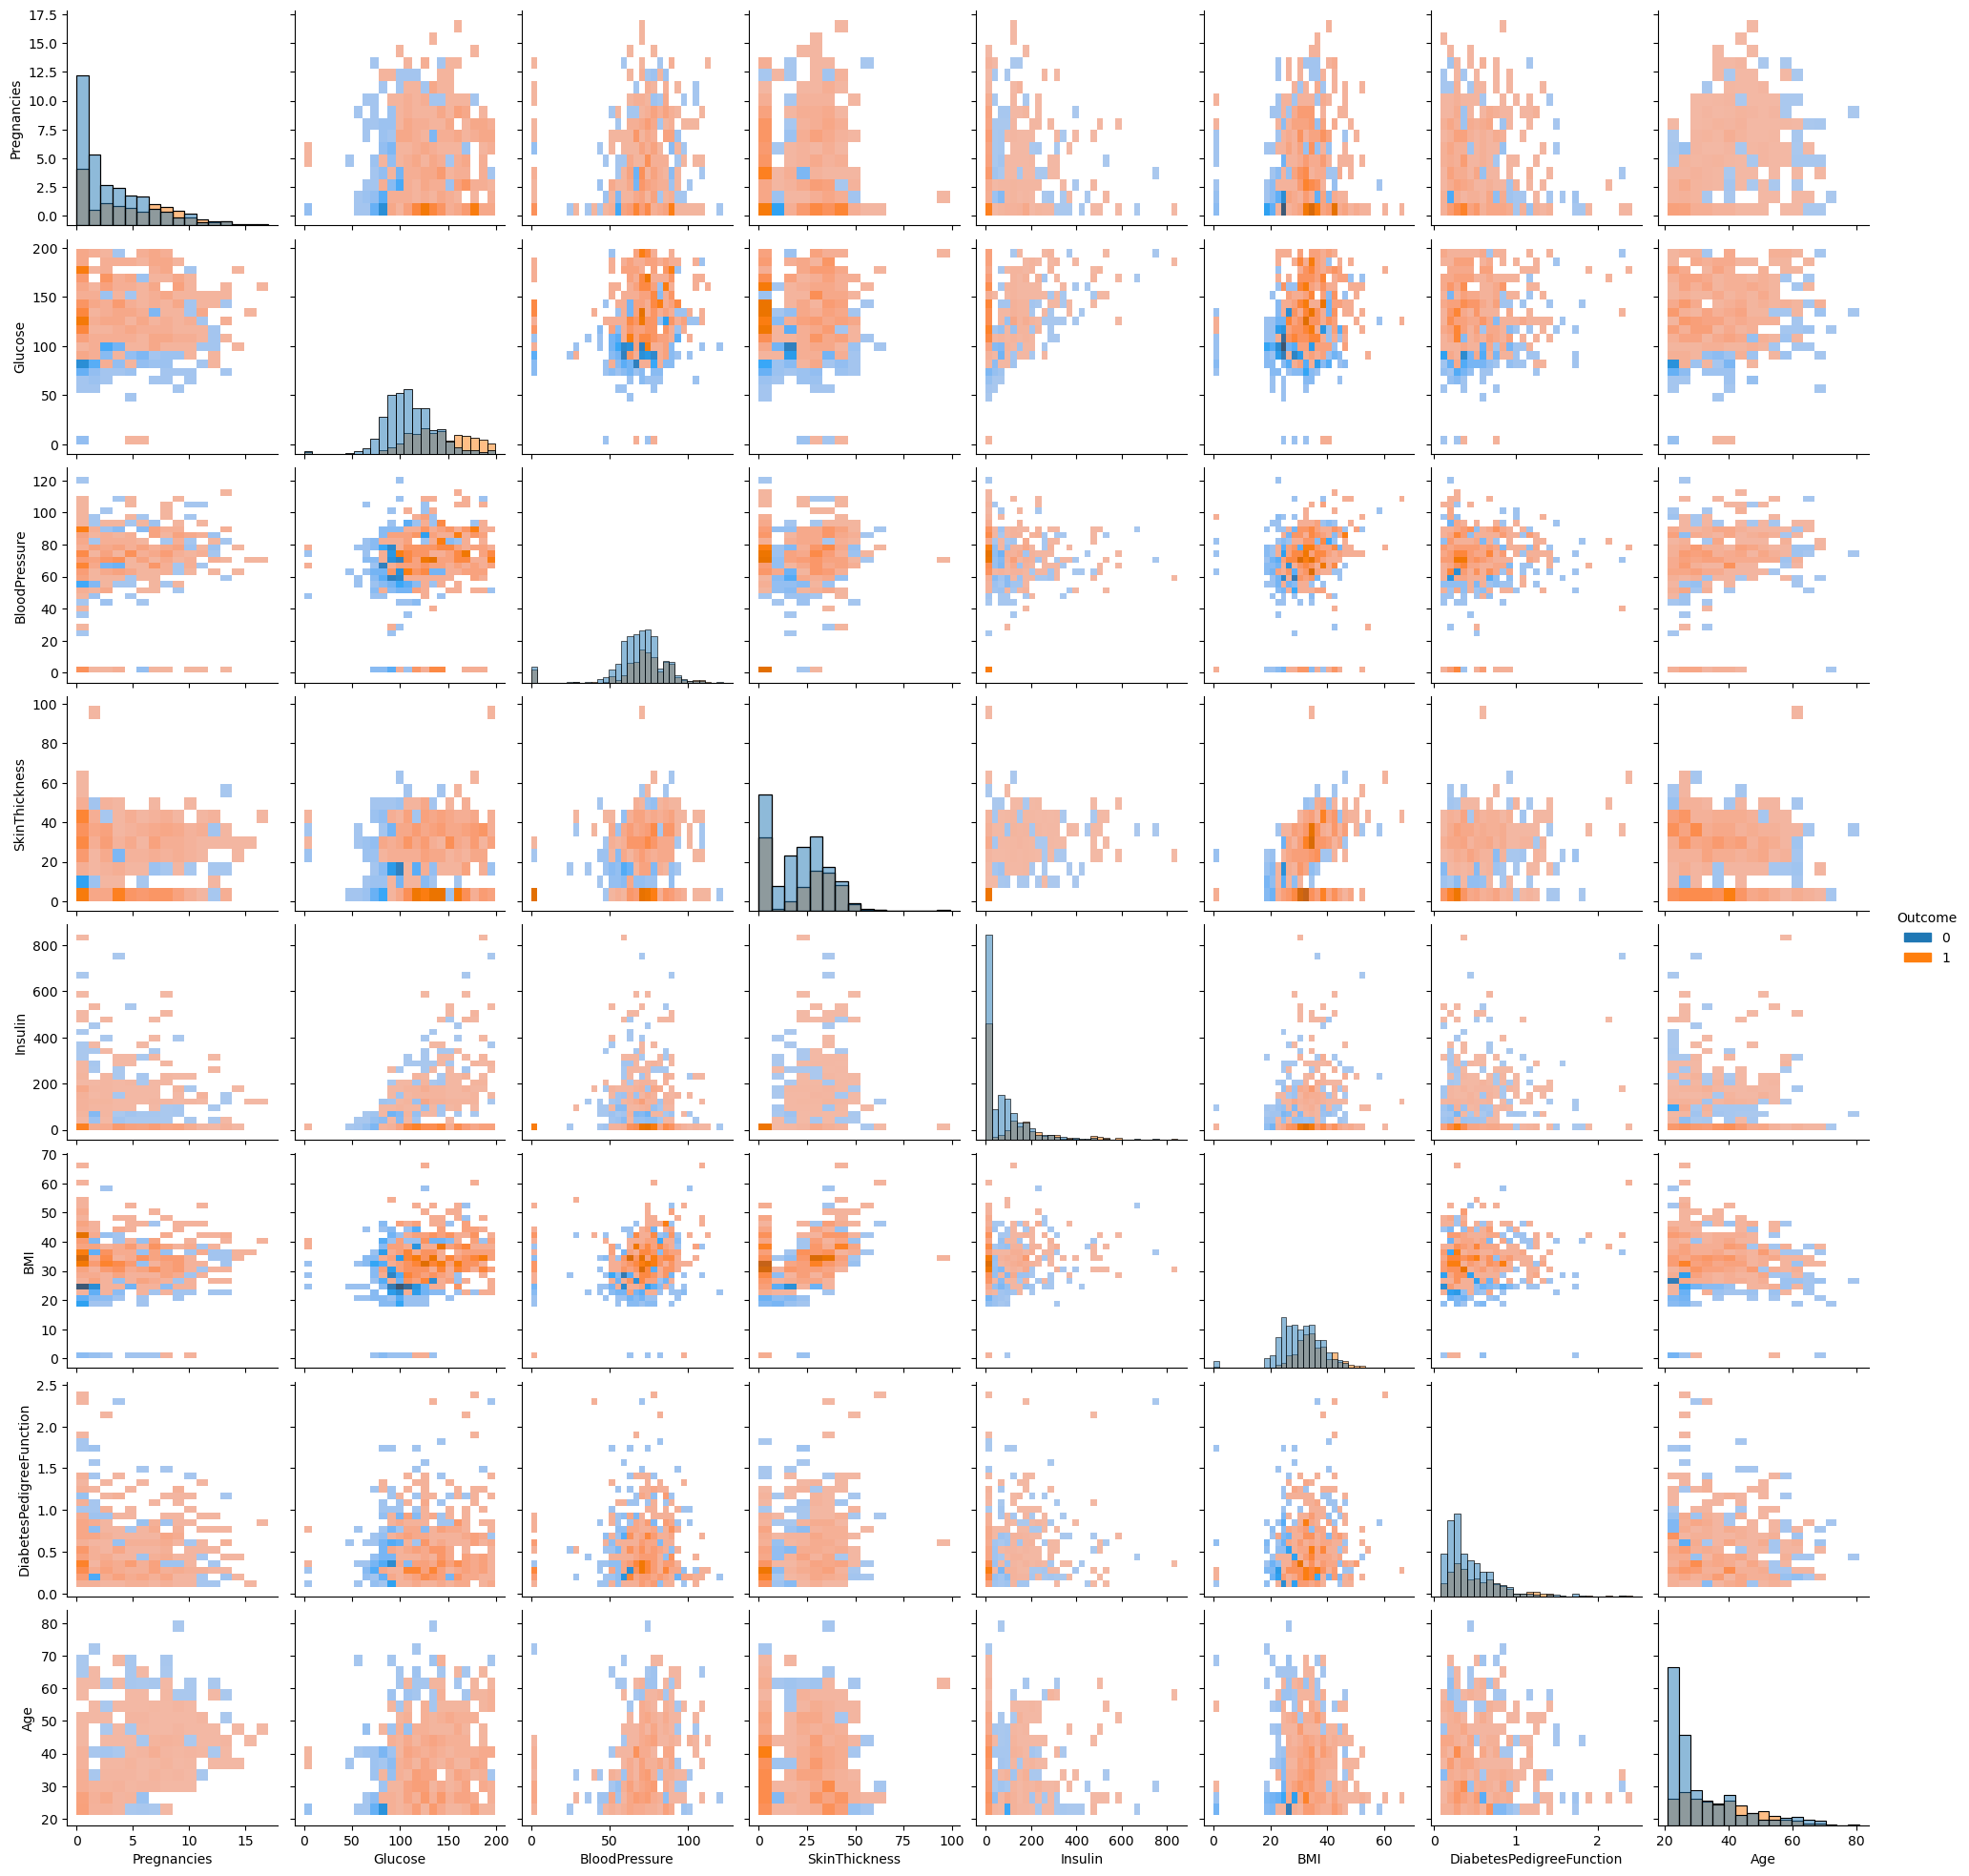

In [11]:
sns.pairplot(diabetes,kind='hist',hue='Outcome')


Correlation Heatmap :

<Axes: >

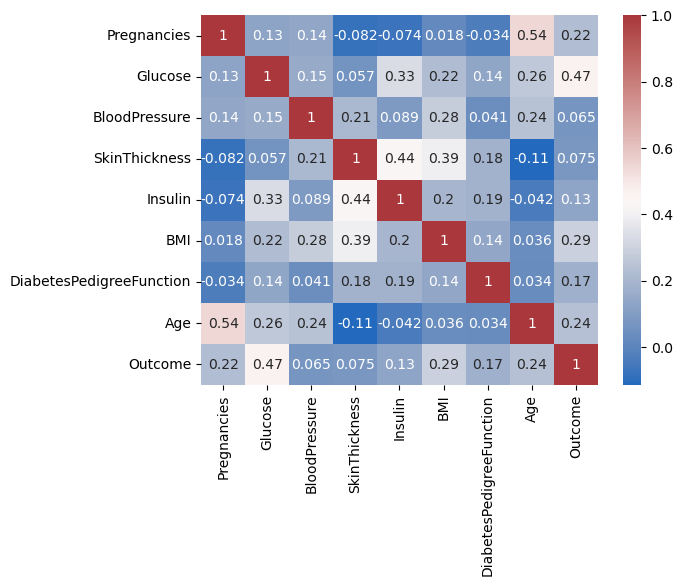

In [12]:
sns.heatmap(diabetes.corr(),annot=True,cmap='vlag')

Data Preprocessing : 

HANDLE MISSING VALUES : 

In [14]:
#0 is not applicable for medical features

In [15]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_with_zero:
    diabetes[col] = diabetes[col].replace(0, diabetes[col].median())

Feature & Target Split:

In [17]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building : 

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = model.predict(X_test)

Model Evaluation :

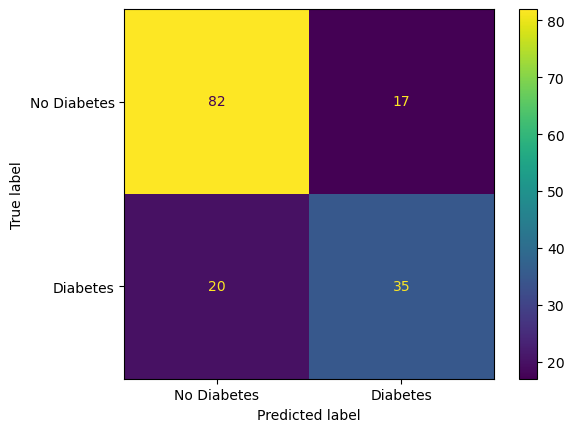

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes","Diabetes"])
disp.plot()
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


In [29]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7323232323232323


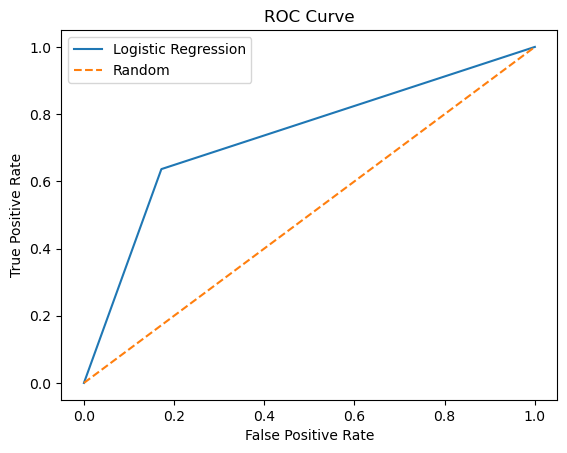

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Interpretation of Model : 

Coefficient Interpretation :

In [34]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
6,DiabetesPedigreeFunction,0.590127
5,BMI,0.106052
0,Pregnancies,0.066213
1,Glucose,0.038540
7,Age,0.033341
3,SkinThickness,0.005406
4,Insulin,-0.002191
2,BloodPressure,-0.014476


In [35]:
#Positive coefficient → increases diabetes probability

#Negative coefficient → decreases probability

In [36]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pickle

with open("diabetes_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [38]:
model = pickle.load(open("diabetes_model.pkl", "rb"))


In [43]:
import os
os.getcwd()


'C:\\Users\\HP'

In [44]:
dir


<function dir>

Interview Questions :

What is the difference between Precision and Recall?

Precision :

In [1]:
#Precision measures how many of the predicted positive cases are actually positive.

#High precision is important when:

#False positives are costly

#Example: Predicting drug response when the patient will not respond

Recall :

In [2]:
#Recall measures how many actual positive cases were correctly identified.

#High recall is important when:

#Missing a positive case is dangerous

#Example: Failing to identify a patient who would benefit from a drug

In [ ]:
Important Obs :

In [3]:
#In drug response classification, recall is more important because:

#Missing a true responder may deny effective treatment

#False positives can be reviewed by doctors, but false negatives are riskier

What is Cross-Validation, and Why Is It Important in Binary Classification?

In [4]:
#Cross-validation is a technique used to evaluate model performance by splitting the data into multiple training and validation sets,
#instead of relying on a single train-test split.

In [5]:
#Common Type: K-Fold Cross-Validation

#Dataset is split into K equal parts (folds)

#Model is trained on K−1 folds

#Tested on the remaining fold

#Process repeats K times

#Final performance is the average of all folds

In [6]:
#Cross-Validation Is Important because :

#Reduces Overfitting
#Better for Small Datasets
#Essential in Binary Classification